# 1. Install necessary packages

install.packages(c("TSA", "tseries", "forecast"), dep=T)

In [9]:
# Load the packages you intend to work with every time you start a new session
library(tseries)
library(TSA)
library(forecast)

Loading required package: leaps
Loading required package: locfit
locfit 1.5-9.1 	 2013-03-22
Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-12. For overview type 'help("mgcv-package")'.

Attaching package: ‘TSA’

The following objects are masked from ‘package:stats’:

    acf, arima

The following object is masked from ‘package:utils’:

    tar

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate

Attaching package: ‘timeDate’

The following objects are masked from ‘package:TSA’:

    kurtosis, skewness

This is forecast 7.1 


Attaching package: ‘forecast’

The following objects are masked from ‘package:TSA’:

    fitted.Arima, plot.Arima

The following object is masked from ‘package:nlme’:

    getResponse



# 2. CREATE TIME SERIES OBJECTS IN R

In [10]:
### Object of class time series (ts)
args(ts)

function (data = NA, start = 1, end = numeric(), frequency = 1, 
    deltat = 1, ts.eps = getOption("ts.eps"), class = if (nseries > 
        1) c("mts", "ts", "matrix") else "ts", names = if (!is.null(dimnames(data))) colnames(data) else paste("Series", 
        seq(nseries))) 
NULL

In [11]:
### Load data

# climatic index for southern Europe
NAO <- read.table("http://www.escet.urjc.es/biodiversos/R/NAO.txt", header=T, sep="\t")
str(NAO)

'data.frame':	146 obs. of  2 variables:
 $ year: int  1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 ...
 $ NAO : num  -1.02 -1.24 0.54 -1.38 2.81 1.7 -3.01 -1.01 -0.76 -0.5 ...


## Aside: plot multivariate time series

In [12]:
parasit <- read.table("http://www.escet.urjc.es/biodiversos/R/parasitismo.txt", header=T, sep="\t")

In [13]:
head(parasit)

,Puestas,Nacidas,Parasitismo,Yr
1,1.84000e+02,1.67000e+02,9.23913e-02,1.97500e+03
2,221.0000000,161.0000000,0.2714932,1975.0000000
3,174.0000000,136.0000000,0.2183908,1975.0000000
4,2.380000e+02,2.220000e+02,6.722689e-02,1.975000e+03
5,1.930000e+02,1.870000e+02,3.108808e-02,1.975000e+03
6,2.370000e+02,2.350000e+02,8.438819e-03,1.975000e+03


In [14]:
colnames(parasit) <- c("N_eggs", "Born", "Parasit", "Year")

In [15]:
head(parasit)

,N_eggs,Born,Parasit,Year
1,1.84000e+02,1.67000e+02,9.23913e-02,1.97500e+03
2,221.0000000,161.0000000,0.2714932,1975.0000000
3,174.0000000,136.0000000,0.2183908,1975.0000000
4,2.380000e+02,2.220000e+02,6.722689e-02,1.975000e+03
5,1.930000e+02,1.870000e+02,3.108808e-02,1.975000e+03
6,2.370000e+02,2.350000e+02,8.438819e-03,1.975000e+03


In [16]:
str(parasit) # 3 variables that change over time

'data.frame':	4477 obs. of  4 variables:
 $ N_eggs : int  184 221 174 238 193 237 217 234 165 192 ...
 $ Born   : int  167 161 136 222 187 235 172 213 155 142 ...
 $ Parasit: num  0.0924 0.2715 0.2184 0.0672 0.0311 ...
 $ Year   : int  1975 1975 1975 1975 1975 1975 1975 1975 1975 1975 ...


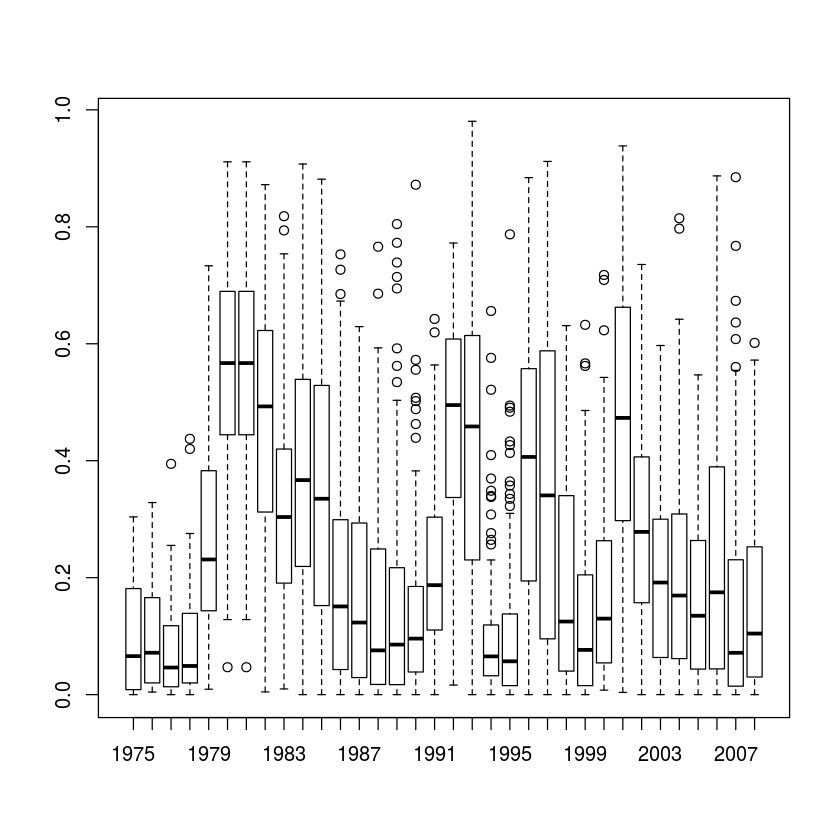

In [17]:
boxplot(Parasit~Year, parasit)

## get mean value of each variable for each year

In [18]:
# applys func 'mean' on the first the cols, group them by year
# this will reduce the data set from 4000+ rows to 30+ rows
aggregate(parasit[,1:3], list(parasit$Year), mean)

,Group.1,N_eggs,Born,Parasit
1,1.975000e+03,2.026333e+02,1.836333e+02,9.772105e-02
2,1976.0000000,229.4333333,206.7666667,0.1012097
3,1.977000e+03,2.376667e+02,2.184000e+02,8.502831e-02
4,1.978000e+03,2.446667e+02,2.215000e+02,9.740252e-02
5,1979.000000,225.166667,165.900000,0.268372
6,1980.0000000,218.4000000,97.9111111,0.5539533
7,1981.0000000,218.4000000,97.9111111,0.5539533
8,1982.000000,216.738889,116.850000,0.463918
9,1983.0000000,209.6611111,145.3500000,0.3118938
10,1984.0000000,207.3105590,130.0000000,0.3747483


In [19]:
parasit.mean <- aggregate(parasit[,1:3], list(parasit$Year), mean)

In [20]:
str(parasit)

'data.frame':	4477 obs. of  4 variables:
 $ N_eggs : int  184 221 174 238 193 237 217 234 165 192 ...
 $ Born   : int  167 161 136 222 187 235 172 213 155 142 ...
 $ Parasit: num  0.0924 0.2715 0.2184 0.0672 0.0311 ...
 $ Year   : int  1975 1975 1975 1975 1975 1975 1975 1975 1975 1975 ...


In [21]:
str(parasit.mean)

'data.frame':	34 obs. of  4 variables:
 $ Group.1: int  1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 ...
 $ N_eggs : num  203 229 238 245 225 ...
 $ Born   : num  184 207 218 222 166 ...
 $ Parasit: num  0.0977 0.1012 0.085 0.0974 0.2684 ...


In [22]:
parasit.ts <- ts(data=parasit.mean[,2:4], start=min(parasit.mean$Group.1))

In [23]:
str(parasit.ts)

 Time-Series [1:34, 1:3] from 1975 to 2008: 203 229 238 245 225 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:3] "N_eggs" "Born" "Parasit"


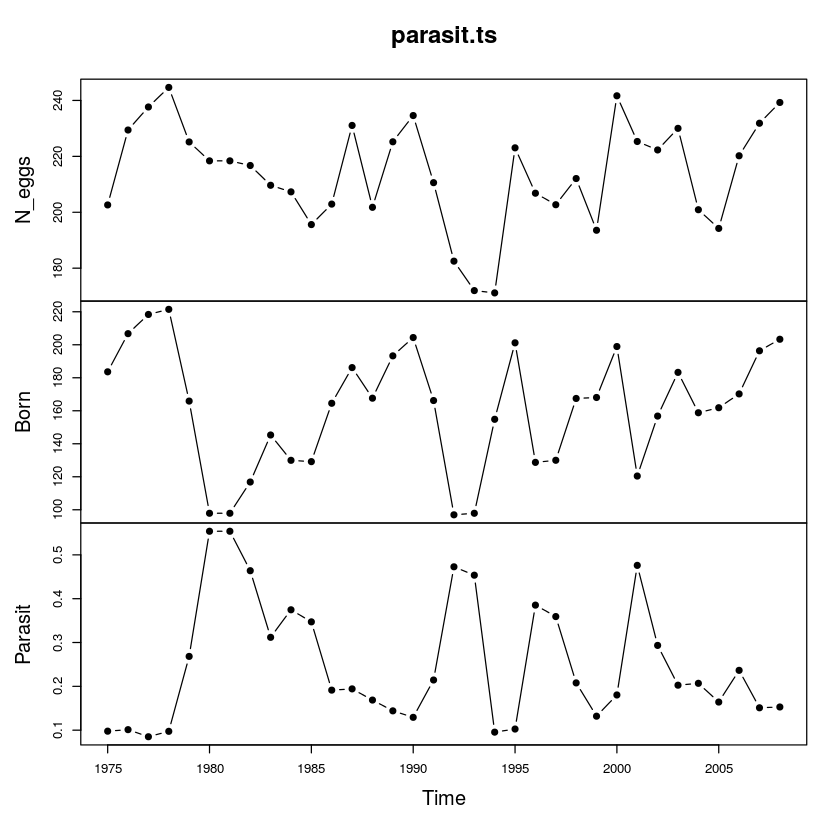

In [24]:
# plot all 3 timeseries stored in parasit.ts
plot(parasit.ts, type = "b", pch=19)

# aside: frequencies

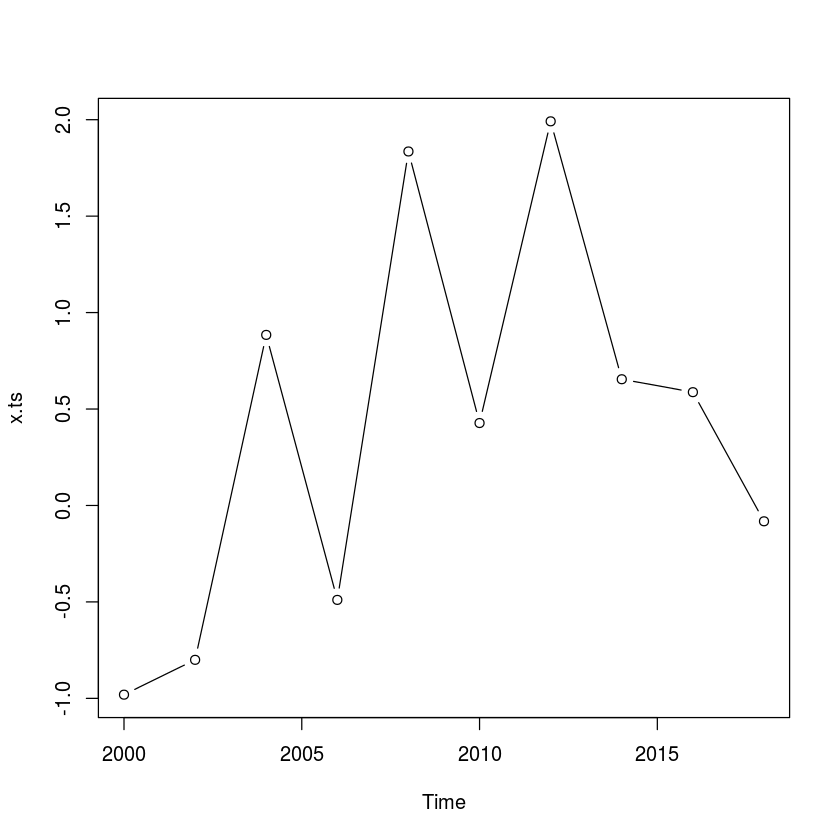

In [27]:
x <- rnorm(10)
x.ts <-ts(x, start=2000, frequency=1/2) # time series: 2000, 2002, 2004, ...
plot(x.ts, type="b")

## back to NAO data set

In [26]:
head(NAO)

,year,NAO
1,1864.00,-1.02
2,1865.00,-1.24
3,1866.00,0.54
4,1867.00,-1.38
5,1868.00,2.81
6,1869.0,1.7


In [27]:
# $ is used to access a column by name
NAO$NAO[1:5] # get the first 5 values from column NAO

[1] -1.02 -1.24  0.54 -1.38  2.81

In [28]:
# get min / max value from a column
min(NAO$year)
max(NAO$year)

[1] 1864

[1] 2009

In [29]:
### Coerce data to a time series
NAO.ts <- ts(data=NAO$NAO, start=min(NAO$year), end=max(NAO$year))

In [30]:
class(NAO.ts)

[1] "ts"

In [31]:
str(NAO.ts)

 Time-Series [1:146] from 1864 to 2009: -1.02 -1.24 0.54 -1.38 2.81 1.7 -3.01 -1.01 -0.76 -0.5 ...


In [32]:
NAO.ts

Time Series:
Start = 1864 
End = 2009 
Frequency = 1 
  [1] -1.02 -1.24  0.54 -1.38  2.81  1.70 -3.01 -1.01 -0.76 -0.50  2.32 -1.35
 [13]  0.21  0.05  1.46 -2.22  0.89 -3.80  3.87 -0.23  1.44 -0.89 -1.12  0.45
 [25] -2.75 -0.01  1.78 -0.82 -2.02 -1.07  2.68 -3.97  1.12  1.09  1.02  0.03
 [37] -2.13 -0.33 -1.41  3.89  0.23  1.98  2.06  2.06  1.44  0.00  2.10  0.29
 [49]  0.24  2.69  1.48 -0.20 -0.69 -3.80 -0.80 -0.80  3.18  1.63  1.85  1.73
 [61] -1.13  2.39  0.11  1.72  0.63 -1.03  0.91 -0.16 -0.50  0.25  0.86  0.97
 [73] -3.89  0.72  1.79  0.37 -2.86 -2.31 -0.55  1.48  0.61  1.64  0.27 -2.71
 [85]  1.34  1.87  1.40 -1.26  0.83  0.18  0.13 -2.52 -1.73  1.52 -1.02 -0.37
 [97] -1.54  1.80 -2.38 -3.60 -2.86 -2.88 -1.69  1.28 -1.04 -4.89 -1.89 -0.96
[109]  0.34  2.52  1.23  1.63  1.37 -2.14  0.17 -2.25  0.56  2.05  0.80  3.42
[121]  1.60 -0.63  0.50 -0.75  0.72  5.08  3.96  1.03  3.28  2.67  3.03  3.96
[133] -3.78 -0.17  0.72  1.70  2.80 -1.90  0.76  0.20 -0.07  0.12 -1.09  2.80
[145]  2.1

In [33]:
# show usage examples for ts (time series)
# example(ts)

In [34]:
### Time series for seasonal data (one data point for each quarter)
ts(1:10, frequency = 4, start = c(1959, 2))

     Qtr1 Qtr2 Qtr3 Qtr4
1959         1    2    3
1960    4    5    6    7
1961    8    9   10     

In [35]:
### Time series for seasonal data (one data point per month)
ts(1:10, frequency = 12, start = c(1959, 2))

     Feb Mar Apr May Jun Jul Aug Sep Oct Nov
1959   1   2   3   4   5   6   7   8   9  10

In [36]:
# example: rnorm(5) generates 5 random deviates from a standard normal distribution. 
rnorm(5)

[1]  0.7852463  1.2812884  0.7406675 -0.4067842  0.5248128

In [37]:
ts(rnorm(30), frequency = 12, start = c(12, 2))

           Jan         Feb         Mar         Apr         May         Jun
12              0.16028171 -0.73383403  1.52174387  0.95142907  1.06243408
13 -1.50551959  0.01115534 -0.10495547 -1.11450573  1.03703155  0.17827385
14  1.65039901 -1.36994730  1.42360670  0.45819786  0.54997162 -0.59761169
           Jul         Aug         Sep         Oct         Nov         Dec
12 -0.91357621 -0.71566556 -1.13639096 -0.31159742 -0.34678193 -0.17799821
13 -0.78066784  0.22708822 -1.22720221  0.34439615 -0.58729947  0.53606136
14  0.04711057                                                            

In [38]:
# matrix w/ 4 rows and 3 cols w/ 12 random vals
# from a std normal distribution
matrix(rnorm(12), 4, 3)

-0.3376158,-0.3496009,0.3918596
0.4036282,-0.1119681,0.1335451
-0.2905250,-0.3075104,0.3750741
1.0907758,-0.9884784,1.0616332


In [39]:
### Multivariate time series data set
z <- ts(matrix(rnorm(30), 10, 3), start=c(1961, 1), frequency=12)

In [40]:
class(z)

[1] "mts"    "ts"     "matrix"

In [41]:
z

Series 1,Series 2,Series 3
-0.8479652,0.8199246,-0.3816275
0.1875589,-0.3351113,-0.9632297
-0.6372144,-0.9540425,0.4254205
0.8360656,0.6044120,-0.1473610
-0.5722650,0.6116864,-0.3253798
-1.3542295,1.1775621,-0.3292269
-0.2230566,-2.0570671,-0.6740782
-1.1768531,0.7498505,1.2256029
-0.09101960,-0.09478786,-0.10037859
-0.5351848,1.4588669,1.9429513


In [42]:
zp <- z[,2] # access the time series stored in col 2

In [43]:
zp

             Jan         Feb         Mar         Apr         May         Jun
1961  0.81992457 -0.33511126 -0.95404245  0.60441204  0.61168641  1.17756209
             Jul         Aug         Sep         Oct
1961 -2.05706706  0.74985048 -0.09478786  1.45886689

In [44]:
class(zp)

[1] "ts"

# 3. PLOT A TIME SERIES

## Regular plot

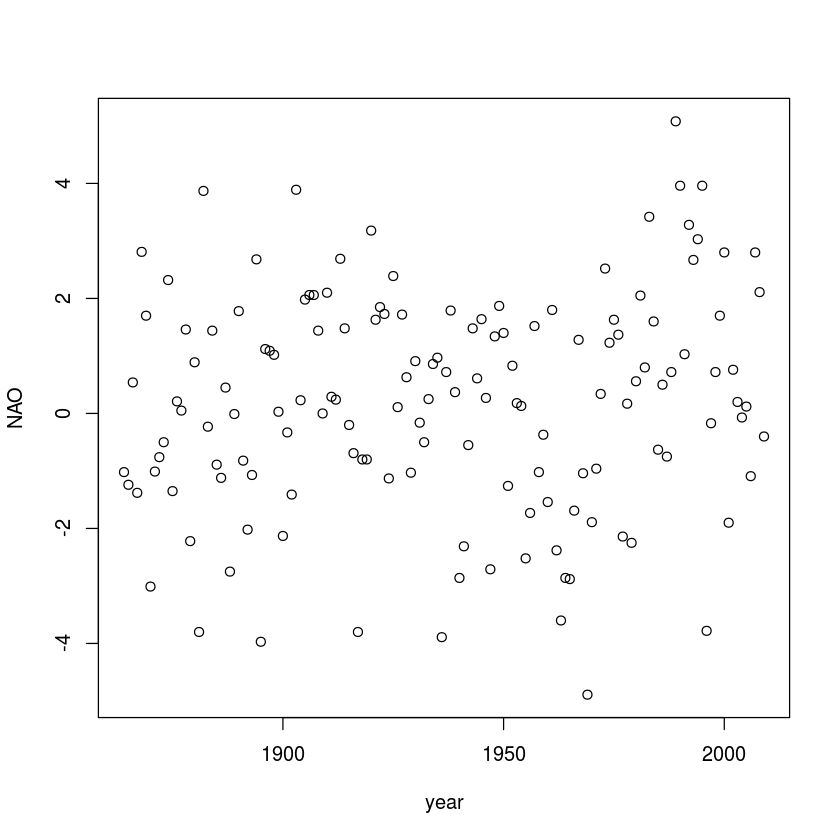

In [45]:
# "plot 'NAO$NAO' as a function of 'NAO$year'"
plot(NAO~year, data=NAO)

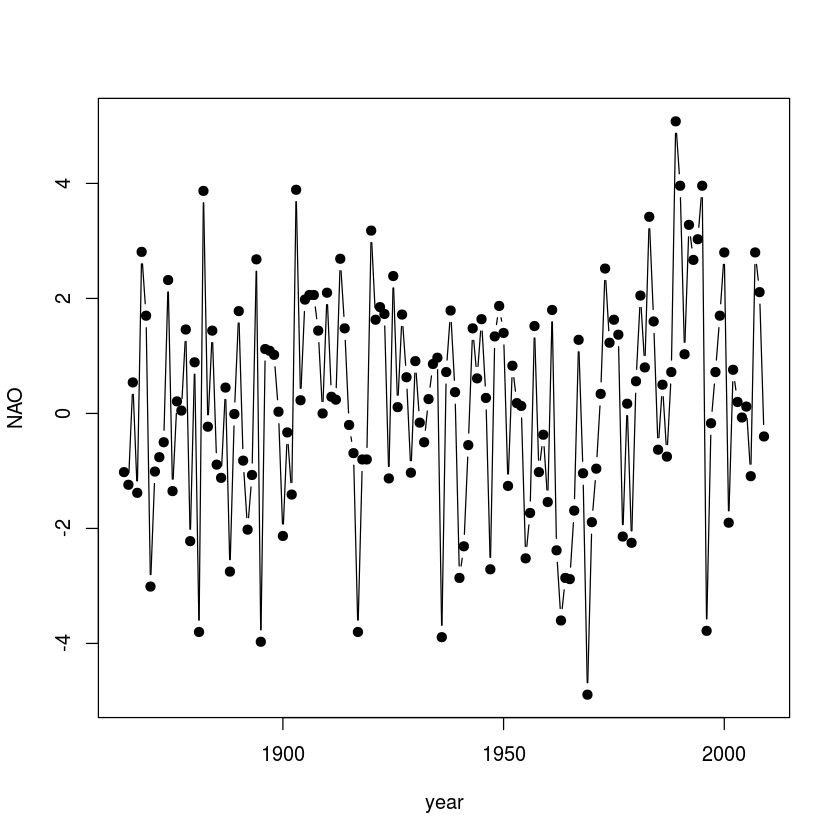

In [46]:
# add unconnected lines (type b) between data points
# and use a different pch (plotting character)
plot(NAO~year, data=NAO, type="b", pch=19)

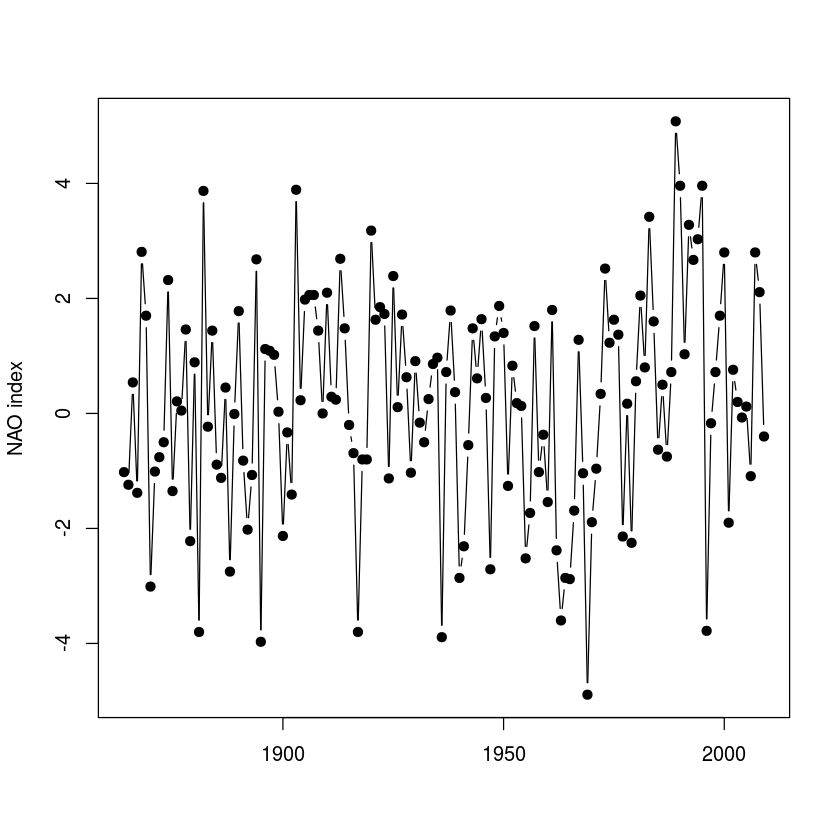

In [47]:
plot(NAO~year, data=NAO, type="b", pch=19, ylab="NAO index", xlab="")

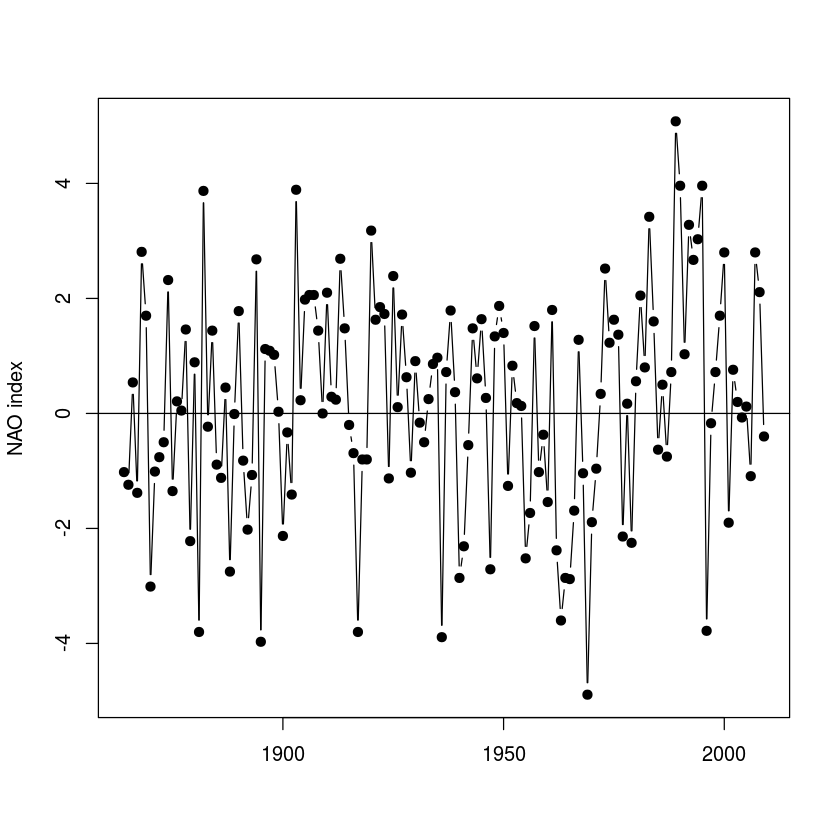

In [48]:
### same plot with abline (horizontal line)
plot(NAO~year, data=NAO, type="b", pch=19, ylab="NAO index", xlab="")
abline(h=0)

'data.frame':	34 obs. of  4 variables:
 $ Group.1    : int  1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 ...
 $ Puestas    : num  203 229 238 245 225 ...
 $ Nacidas    : num  184 207 218 222 166 ...
 $ Parasitismo: num  0.0977 0.1012 0.085 0.0974 0.2684 ...


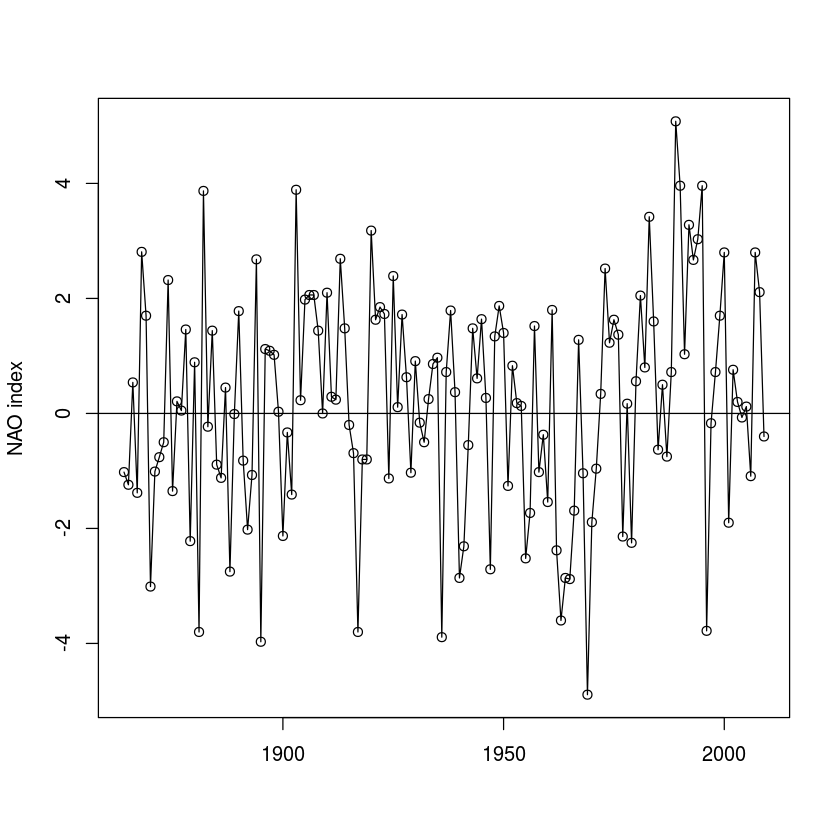

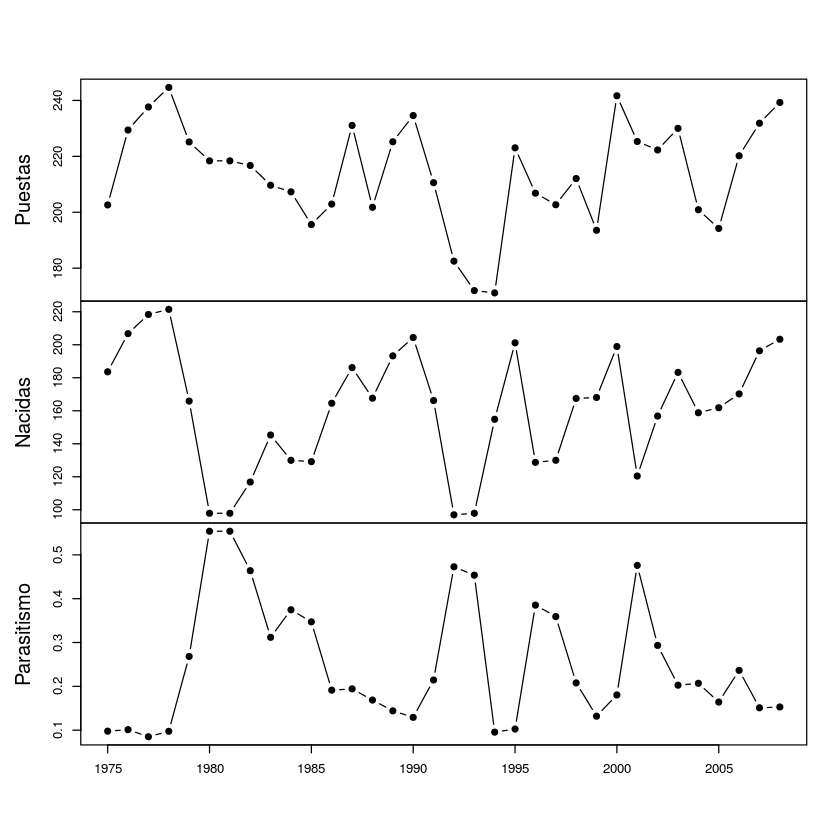

In [49]:
### Time series plot
x11()
plot(NAO.ts, type="o", ylab="NAO index", xlab="")
abline(h=0)
### Multivariate time series plot
parasit <- read.table("http://www.escet.urjc.es/biodiversos/R/parasitismo.txt", header=T, sep="\t")
parasit.mean <- aggregate(parasit[,1:3],list(parasit$Yr),mean)
str(parasit.mean)
parasit.ts <- ts(parasit.mean[,2:4], start=min(parasit.mean$Group.1))
plot(parasit.ts, type="b", pch=19, xlab="", main="")